<a href="https://colab.research.google.com/github/KratosOfficcial/Magistv/blob/main/IA_xtts_webui_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

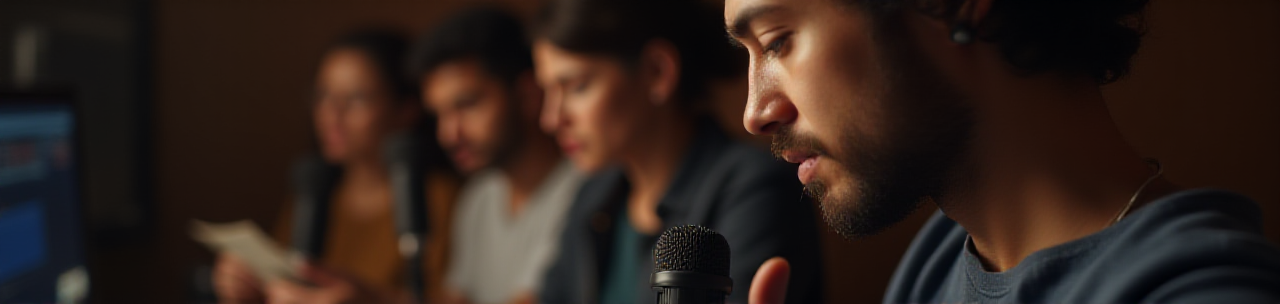

# IA XTTS Text to Voice 3.0 Gradio UI


This new version supports extended generation time and has improved synthesis speed, making it over twice as fast. Additionally, more than 2000 new voices have been added. It also includes a new option to clone your voice.

Visit My Channel: [Sistema de Interes](https://www.youtube.com/channel/UC1ejkTHsiq8aQAeYIZyIyeg)

In [ ]:
# @title 🛠️ Install requirments
#!DEBIAN_FRONTEND=noninteractive
!sudo apt-get update # && sudo apt-get -y upgrade
!sudo apt-get -y install libegl1
!sudo apt-get -y install libopengl0
!sudo apt-get -y install libxcb-cursor
!pip install gradio==4.44.1
!pip install fastapi==0.103.1
!pip install pydantic==2.3.0
!pip install ctranslate2==4.4.0
!git clone https://huggingface.co/spaces/IAsistemofinteres/xtts-webui
%cd xtts-webui
!pip install -r requirements.txt

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,531 kB]
Get:13 http://security.ubuntu.com/ubuntu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: starlette
    Found existing installation: starlette 0.41.3
    Uninstalling starlette-0.41.3:
      Successfully uninstalled starlette-0.41.3
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.115.6
    Uninstalling fastapi-0.115.6:
      Successfully uninstalled fastapi-0.115.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.5/374.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.3
    Uninst

In [ ]:
#@title Download Model New Voices
import os

# Directorio de destino
directory_path = '/content/xtts-webui/model'

# Crea el directorio si no existe
os.makedirs(directory_path, exist_ok=True)

# Verifica si el directorio se ha creado correctamente
if os.path.exists(directory_path):
    print(f"El directorio '{directory_path}' se ha creado correctamente o ya existe.")
else:
    print("Hubo un problema al crear el directorio.")

!wget https://huggingface.co/IAsistemofinteres/xtts_model/resolve/main/model.zip?download=true -O /tmp/model.zip

!unzip -d /content/xtts-webui/model /tmp/model.zip > /dev/null
print("completed successfully...")
!wget https://huggingface.co/datasets/IAsistemofinteres/vz/resolve/main/vc.zip?download=true -O /tmp/vc.zip > /dev/null 2>&1
!unzip -d /tmp/Voice /tmp/vc.zip > /dev/null
print("completed successfully...")

In [ ]:
# @title 🚀 Run interface
%cd /content/xtts-webui
!python xtts_demo.py --share

In [ ]:
#@title ✅ Save Model (Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Nombre del archivo zip
zip_filename = "" #@param {type: 'string'}

%cd /content/xtts-webui/train_models/ready
!zip -r /content/drive/MyDrive/{zip_filename}.zip .


In [ ]:
#@title ✌ Load your model (Unlimited Slow Download)</font>
#@markdown **Nota:** Add your Google Drive URL
import os
import shutil
from zipfile import ZipFile
from IPython.display import clear_output
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import time

# Montar Google Drive
drive.mount('/content/drive')

# Crear carpeta de salida
os.makedirs('/content/xtts-webui/train_models/ready', exist_ok=True)

# Descargar y extraer el archivo ZIP sin subcarpetas
print("Download Info model...")
!wget https://huggingface.co/IAsistemofinteres/llElevenlabs_XTTS/resolve/main/info_model.zip -O /tmp/info_model.zip > /dev/null 2>&1

with ZipFile('/tmp/info_model.zip', 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if not file_info.is_dir():
            # Extrae el archivo sin la estructura de carpetas
            file_name = os.path.basename(file_info.filename)
            file_path = os.path.join('/content/xtts-webui/train_models/ready', file_name)
            with zip_ref.open(file_info.filename) as source, open(file_path, "wb") as target:
                target.write(source.read())

# Autenticar usuario para PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)

def crear_acceso_directo(enlace):
    if os.path.exists('/content/drive/MyDrive/temporalmodels'):
        shutil.rmtree('/content/drive/MyDrive/temporalmodels')

    # Obtener ID del archivo desde el enlace
    id_archivo = enlace.split('/')[-2]

    # Crear carpeta temporalmodels si no existe
    nueva_carpeta = gdrive.CreateFile({
        'title': 'temporalmodels',
        'mimeType': 'application/vnd.google-apps.folder'
    })
    nueva_carpeta.Upload()
    carpeta_models_id = nueva_carpeta['id']

    # Verificar si ya existe un acceso directo con el mismo nombre
    acceso_directo_existente = gdrive.ListFile({
        'q': f"title='tempmodel' and '{carpeta_models_id}' in parents and mimeType='application/vnd.google-apps.shortcut' and trashed=false"
    }).GetList()

    if acceso_directo_existente:
        acceso_directo = acceso_directo_existente[0]
        acceso_directo['shortcutDetails'] = {'targetId': id_archivo}
        acceso_directo.Upload()
    else:
        # Crear el acceso directo si no existe
        enlace_simbolico = gdrive.CreateFile({
            'mimeType': 'application/vnd.google-apps.shortcut',
            'shortcutDetails': {
                'targetId': id_archivo
            },
            'parents': [{'id': carpeta_models_id}]
        })
        enlace_simbolico.Upload()
        enlace_simbolico.FetchMetadata()

# Ejemplo de enlace de Google Drive
url = "" #@param {type: 'string'}
file_id = url.split('/')[-2]
url = f"https://drive.google.com/file/d/{file_id}/view?usp=share_link"

print("Creando acceso directo...")
crear_acceso_directo(url)

# Espera a que se cree la carpeta temporalmodels
while not os.path.exists("/content/drive/MyDrive/temporalmodels"):
    time.sleep(1)

# Crear carpetas temporales para procesamiento
os.makedirs("/content/tempfolder", exist_ok=True)
os.makedirs("/content/Models", exist_ok=True)

print("Comprimiendo archivo (Esto puede tomar unos minutos)...")
shutil.make_archive("/content/tempfolder/xxx", "zip", "/content/drive/MyDrive/temporalmodels")
print("Copiando a /content/Models...")

# Descomprimir el archivo ZIP en /content/Models sin subcarpetas
with ZipFile("/content/tempfolder/xxx.zip", 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if not file_info.is_dir():
            file_name = os.path.basename(file_info.filename)
            file_path = os.path.join('/content/Models', file_name)
            with zip_ref.open(file_info.filename) as source, open(file_path, "wb") as target:
                target.write(source.read())

# Limpiar carpetas temporales
shutil.rmtree("/content/drive/MyDrive/temporalmodels")
shutil.rmtree("/content/tempfolder")

# Descomprimir los archivos en el directorio de salida sin subcarpetas
for archivo_zip in [archivo for archivo in os.listdir('/content/Models') if archivo.endswith('.zip')]:
    ruta_completa_entrada = os.path.join('/content/Models', archivo_zip)
    with ZipFile(ruta_completa_entrada, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            if not file_info.is_dir():
                file_name = os.path.basename(file_info.filename)
                file_path = os.path.join('/content/xtts-webui/train_models/ready', file_name)
                with zip_ref.open(file_info.filename) as source, open(file_path, "wb") as target:
                    target.write(source.read())

# Limpiar /content/Models
shutil.rmtree("/content/Models")
# Rutas del archivo
ruta_antigua = '/content/xtts-webui/train_models/ready/best_model.pth'
ruta_nueva = '/content/xtts-webui/train_models/ready/unoptimize_model.pth'

try:
    os.rename(ruta_antigua, ruta_nueva)
    print(f"Archivo renombrado exitosamente a {ruta_nueva}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {ruta_antigua}")
except PermissionError:
    print("Error: No tienes permisos para renombrar este archivo.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

print("Descompresión completada del Modelo.")
